In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("ds_salaries.csv")

# df.head()

### Aufgabe 1 Wie viele Einträge hat das Dataset?

In [3]:
df.shape

(607, 12)

In [4]:
df.count()

Unnamed: 0            607
work_year             607
experience_level      607
employment_type       607
job_title             607
salary                607
salary_currency       607
salary_in_usd         607
employee_residence    607
remote_ratio          607
company_location      607
company_size          607
dtype: int64

In [5]:
len(df)

607

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### 2. Welches sind die Top-3 Länder und wie viele Einträge haben sie jeweils?

In [8]:
df["employee_residence"].value_counts().index.to_list()[:3]

['US', 'GB', 'IN']

In [14]:
df["employee_residence"].value_counts()[:3]

employee_residence
US    332
GB     44
IN     30
Name: count, dtype: int64

### 3: Wie hoch ist das Durschnittseinkommen?


In [15]:
df["salary_in_usd"].mean()

112297.86985172982

### 4: Ist das Durchschnittseinkommen von 2020 bis 2022 gestiegen oder gefallen? Visualisieren Sie dies!


In [17]:
years=[2020, 2021, 2022]
avg_2020=df.loc[df["work_year"]==2020, "salary_in_usd"].mean()
avg_2021=df.loc[df["work_year"]==2021, "salary_in_usd"].mean()
avg_2022=df.loc[df["work_year"]==2022, "salary_in_usd"].mean()

In [21]:
years=[2020, 2021, 2022]
avgs=[]
for year in years:
    avgs.append(df.loc[df["work_year"]==year, "salary_in_usd"].mean())

[]

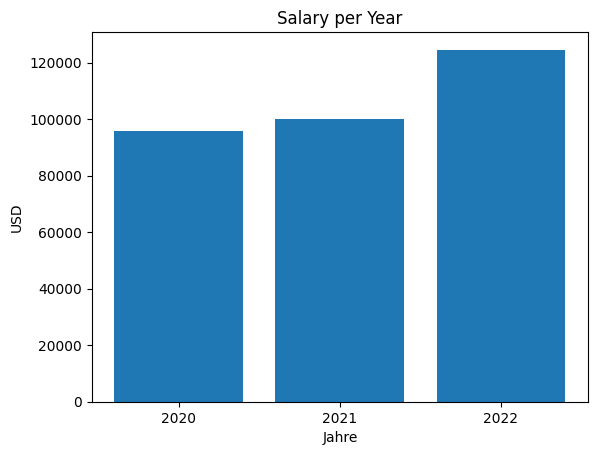

In [24]:
avgs=[avg_2020, avg_2021, avg_2022]
plt.bar(years, avgs)
plt.xticks(years)
plt.xlabel("Jahre")
plt.ylabel("USD")
plt.title("Salary per Year")
plt.plot()

### 5: Es gibt Arbeitnehmer, die in einem anderem Land wohnen, als das in dem sie arbeiten:
* Wie viel Prozent der Arbeitnehmer betrifft dies?
* verdienen sie mehr oder weniger als die NICHT-Pendler

In [27]:
commuter=df[df["employee_residence"]!=df["company_location"]]
ncommuter=df[df["employee_residence"]==df["company_location"]]

commuter_count=commuter["salary_in_usd"].count()
ncommuter_count=ncommuter["salary_in_usd"].count()

commuter_percent=commuter_count/(ncommuter_count+commuter_count)*100
commuter_percent

8.40197693574959

In [28]:
avg_salary_commuter=commuter["salary_in_usd"].mean()
avg_salary_ncommuter=ncommuter["salary_in_usd"].mean()

In [29]:
avg_salary_commuter

76758.35294117648

In [30]:
avg_salary_ncommuter

115557.78956834532

### 6: Welcher Job verspricht das höchste Durschnittseinkommen (job_title)


In [41]:
df["salary_in_usd"].groupby(df["job_title"]).mean().sort_values(ascending=False)[:1]

job_title
Data Analytics Lead    405000.0
Name: salary_in_usd, dtype: float64

In [42]:
df["salary_in_usd"].groupby(df["job_title"]).mean().idxmax()

'Data Analytics Lead'

wie viele gibt es davon eigentlich?

In [43]:
df.loc[df["job_title"]=="Data Analytics Lead"]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
523,523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L


wir wollen nur Job_titles nehmen, die fünf mal vorkommen

In [55]:
# Schritt 1: Eine Liste alle Berufe, die fünf mal vorkommen

df_grp=df.groupby(df["job_title"]).count()
list_of_five_jobs_min=df_grp[df_grp["work_year"]>4].index
list_of_five_jobs_min

Index(['AI Scientist', 'Applied Data Scientist', 'BI Data Analyst',
       'Big Data Engineer', 'Business Data Analyst',
       'Computer Vision Engineer', 'Data Analyst', 'Data Analytics Manager',
       'Data Architect', 'Data Engineer', 'Data Engineering Manager',
       'Data Science Consultant', 'Data Science Manager', 'Data Scientist',
       'Director of Data Science', 'Head of Data', 'Lead Data Engineer',
       'ML Engineer', 'Machine Learning Engineer',
       'Machine Learning Scientist', 'Principal Data Scientist',
       'Research Scientist'],
      dtype='object', name='job_title')

In [60]:
df_with_five_job_titles_min=df.loc[df["job_title"].isin(list_of_five_jobs_min)]

In [61]:
df_with_five_job_titles_min["salary_in_usd"].groupby(df_with_five_job_titles_min["job_title"]).mean().idxmax()


'Principal Data Scientist'

In [62]:
df_with_five_job_titles_min["salary_in_usd"].groupby(df_with_five_job_titles_min["job_title"]).mean().max()

215242.42857142858

### 7: Wie hoch ist Durchschnittseinkommen, gruppiert nach Berufserfahrung


In [76]:
avg_by_exp=df["salary_in_usd"].groupby(df["experience_level"]).mean().sort_values(ascending=False)

In [77]:
avg_by_exp

experience_level
EX    199392.038462
SE    138617.292857
MI     87996.056338
EN     61643.318182
Name: salary_in_usd, dtype: float64

### 8. Eigene Visualisierungen

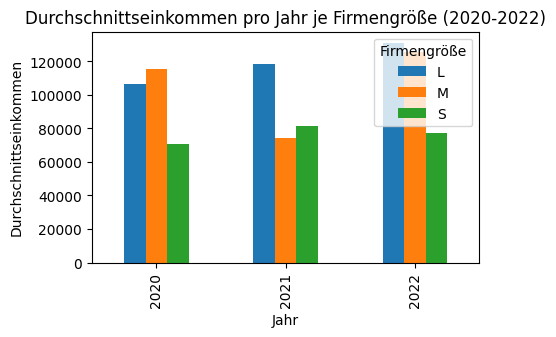

In [83]:
# Jonas
# Gruppiere die Daten nach Jahr und Firmengröße und berechne den Durchschnitt.

avg_by_year_size = df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack()



# Plot vorbereiten

fig, ax = plt.subplots(figsize=(5, 3))



# Diagramm zeichnen

avg_by_year_size.plot(kind='bar', ax=ax)

ax.set_title('Durchschnittseinkommen pro Jahr je Firmengröße (2020-2022)')

ax.set_xlabel('Jahr')

ax.set_ylabel('Durchschnittseinkommen')

ax.legend(title='Firmengröße')



plt.show()

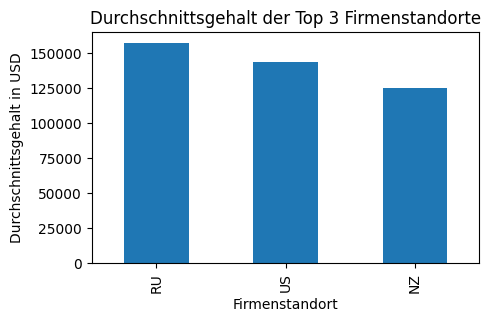

In [84]:
# Jonas


avg_by_location = df.groupby('company_location')['salary_in_usd'].mean()

top_locations = avg_by_location.sort_values(ascending=False).head(3)

fig, ax = plt.subplots(figsize=(5, 3))

top_locations.plot(kind='bar', ax=ax)

ax.set_title('Durchschnittsgehalt der Top 3 Firmenstandorte')

ax.set_xlabel('Firmenstandort')

ax.set_ylabel('Durchschnittsgehalt in USD')

plt.show()

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
DZ    100000.000000
AE    100000.000000
IQ    100000.000000
CA     99823.733333
Name: salary_in_usd, dtype: float64


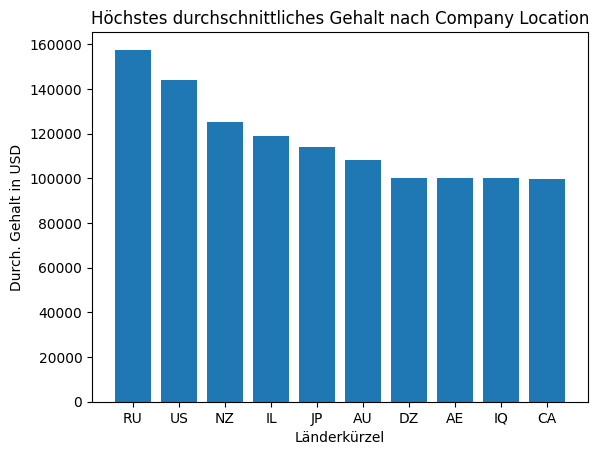

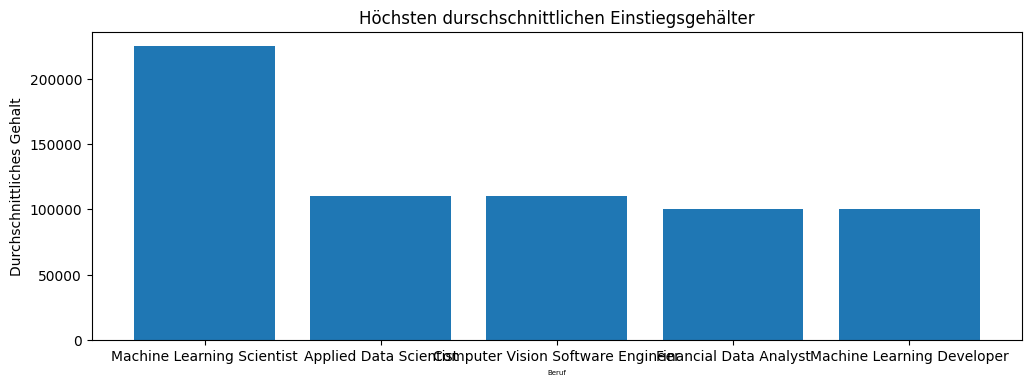

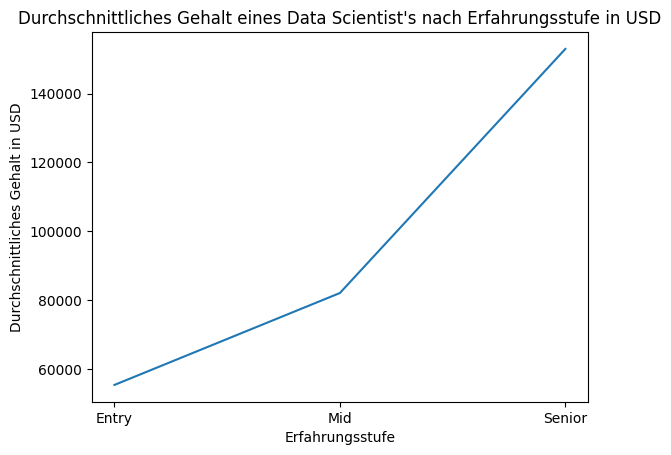

In [88]:
# Tyrone
	
# 1. Top 5 Best Earning Countries (By Company Location)

avg_saleries = df["salary_in_usd"].groupby(df["company_location"]).mean().sort_values(ascending=False).head(10)

print(avg_saleries)

countries = df["salary_in_usd"].groupby(df["company_location"]).mean().sort_values(ascending=False).head(10).index

plt.bar(countries, avg_saleries)

plt.xlabel("Länderkürzel")

plt.ylabel("Durch. Gehalt in USD")

plt.title("Höchstes durchschnittliches Gehalt nach Company Location")

plt.show()



# 2. Highest Paying Entry Level Job

avg_entry = df.loc[df["experience_level"] == "EN" ,"salary_in_usd"].groupby(df["job_title"]).mean().sort_values(ascending=False).head(5)

jobs = ["Machine Learning Scientist", "Applied Data Scientist", "Computer Vision Software Engineer", "Financial Data Analyst", "Machine Learning Developer"]

fig = plt.figure()

fig.set_size_inches((12,4))

plt.bar(jobs, avg_entry)

plt.xlabel("Beruf", fontsize=5)

plt.ylabel("Durchschnittliches Gehalt")

plt.title("Höchsten durschschnittlichen Einstiegsgehälter")

plt.show()



# 3. Salery Development by Job Experience

exp_levels = ["Entry", "Mid", "Senior"]

data_scientist_avg = df.loc[df["job_title"] == "Data Scientist", "salary_in_usd"].groupby(df["experience_level"]).mean()

plt.plot(exp_levels, data_scientist_avg)

plt.xlabel("Erfahrungsstufe")

plt.ylabel("Durchschnittliches Gehalt in USD")

plt.title("Durchschnittliches Gehalt eines Data Scientist's nach Erfahrungsstufe in USD")

plt.show()

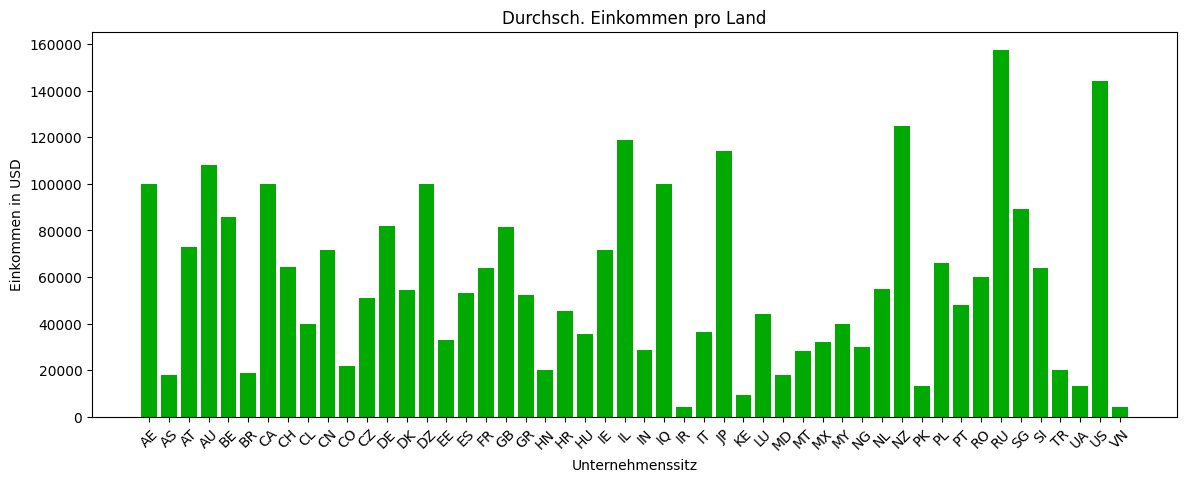

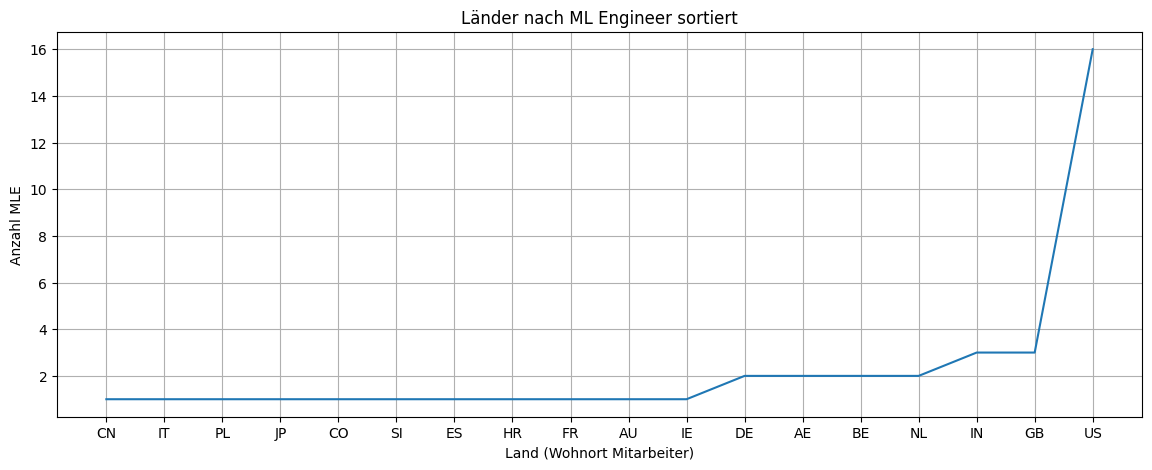

In [89]:
# Ole

# Durchschnittliches Einkommen pro Land
comp_money = df["salary_in_usd"].groupby(df["company_location"]).mean()
fig = plt.figure()
fig.set_size_inches(14, 5)
plt.bar(comp_money.keys(), comp_money, color="#00AA00")
plt.title("Durchsch. Einkommen pro Land")
plt.xlabel("Unternehmenssitz")
plt.ylabel("Einkommen in USD")
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()

# Welches Land hat die meisten Machine Learning Engineer
amt = df["employee_residence"][df["job_title"] == "Machine Learning Engineer"].value_counts().sort_values(ascending=True)

fig2 = plt.figure()
fig2.set_size_inches(14, 5)
plt.plot(amt.keys(), amt)
plt.title("Länder nach ML Engineer sortiert")
plt.xlabel("Land (Wohnort Mitarbeiter)")
plt.ylabel("Anzahl MLE")
plt.grid(True)
plt.show()